In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('namecoin_ml.csv')
df.head()

,txid,bitcoin_block_hash,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,sample_id
0,000067aab52e2fc6bbf6acf49369f5e7e5caf43e88ab92...,8efe9c7fa8114641c04f64a8c5266b0070ee253e395d76...,1426729457,28928,2,22.90,22.89,0.01,2,22.89,22.88,0.01,221,mehr,8
1,00006a088a7d69602bc3dbb7f37ab89bd830806d3aa04f...,b5f8270000c0eaf2f20ea899caf4c248a9765e1d8e6769...,1470465833,28928,6,25.95,8.64,0.01,6,25.92,8.63,0.01,1419,mehr,8
2,0000e5b7217ee5f13bd808b1484abc1d43222364b09608...,a8aa181b737360ff9e89cbb28bf9b46862b4392d39a749...,1472222325,28928,2,38.91,38.90,0.01,2,38.90,38.89,0.01,26,mehr,8
3,000176f4c18b578088ee265b6004b2d434edd2f21372c2...,51c8a30fe2dcfd5395e806ea2f4ae0559237a6f007d36f...,1410052295,28928,1,0.01,0.01,0.01,1,0.01,0.01,0.01,28,pubkeyhash,8
4,0001b50a5b744bcc23385e65f931f89f9c0f6c6042742a...,285f032b26971de702446bb35b271ee05d43d574587e1c...,1448873436,28928,2,18.39,18.38,0.01,2,18.39,18.38,0.01,848,mehr,8


In [4]:
len(df)

469817

In [5]:
labels_all = ['anz_inputs','sum_in','max_in','min_in','anz_outputs','sum_out','max_out','min_out','anz_trans_in_block','script_type']
labels = ['anz_inputs','sum_in','max_in','min_in','anz_outputs','sum_out','max_out','min_out','anz_trans_in_block']
labels_all_ass = ['anz_inputs','sum_in','anz_outputs','sum_out','anz_trans_in_block','script_type','assignments']

First lets see how our data is distributed

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe(include='all')

,txid,bitcoin_block_hash,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,sample_id
count,469817,469817,"469,817.00","469,817.00","469,817.00","434,815.00","434,815.00","434,815.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00",469817,"469,817.00"
unique,469817,107838,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,3,nan
top,c4b39216f2dc7788d0cb61d75c0fc724c4b060983d68dc...,842ec7ee4a34f9e98751c40ecd05d1d6cb57d87b31a8e4...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,mehr,nan
freq,1,225,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,325275,nan
mean,NaN,NaN,"1,415,603,491.53","23,311.51",2.10,459.82,447.60,149.57,3.68,428.68,421.32,280.02,314.47,NaN,8.00
std,NaN,NaN,"42,034,590.93","11,442.18",8.72,"13,043.00","12,806.74","5,999.31",22.68,"12,548.22","12,341.92","10,999.61",394.21,NaN,0.00
min,NaN,NaN,"1,303,220,423.00",1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,NaN,8.00
25%,NaN,NaN,"1,391,568,011.00","28,928.00",1.00,5.91,5.69,0.01,2.00,7.12,6.88,0.01,26.00,NaN,8.00
50%,NaN,NaN,"1,427,646,027.00","28,928.00",2.00,19.33,18.85,0.01,2.00,21.36,20.75,0.01,147.00,NaN,8.00
75%,NaN,NaN,"1,448,081,623.00","28,928.00",2.00,37.49,37.19,16.57,2.00,41.28,40.43,0.01,460.00,NaN,8.00


What does this tell us about our data?:
* anz_inputs - has massive outliers on the max side and the value one and two is very prominent
* sum_in - maximum value again is huge but seems to be more variance on 0 to 40 values. Also missing values occur
* max_in - maximum value again quite the outlier. Again missing values
* min_in - maximum value again quite the outlier. Again missing values. Percentiles seem to be a lot on 0.01
* anz_outputs - no missing values, but seems to be centered around 1 and 2 values.. the max value is very high -> Seems there are a lot of Transactions with 1 or 2 outputs and a few with very high outputs
* sum_out - few high value transactions and a lot low value transactions
* max_out - outlier with high valueand a lot of values 0.01 ( which may be namecoin registering fee? ) 
* anz_trans_in_block - seems like an interesting feature , a lotof different values, and seems to be better distributed
* script_type -> only 3 categories and a lot of them are more! Maybe its better to do a one hot encoding already on database level to really use this feature.

lets make a quick histogramm to visualize the distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0701c07a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f070247c438>]], dtype=object)

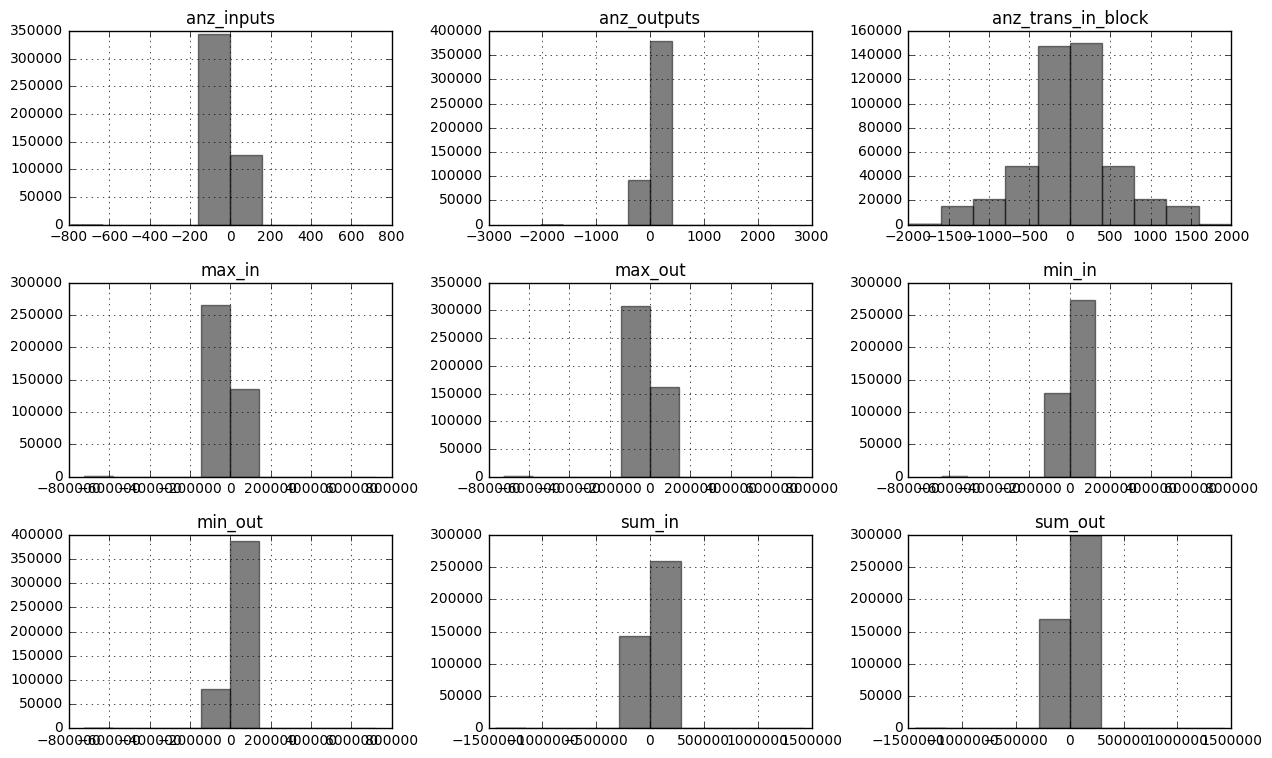

In [7]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 15, 9
plt.figure()
df[labels].diff().hist(color='k', alpha=0.5, bins=10)

anz_trans_in_block seems to be our only realy differentiating feature. The rest we dont see good distributions but also the data has so many outliers

We definitely need to deal with 

* NAN values appear in the inputs of the transaction. This is due to mining operations having no value in this dataset. in Reality they have value and this will be fixed soon so for now we can use a fixed value of 45 ( = highest bitcoin reward)
* Encode the categorical value script_type to make it useable for the clustering algorithms
* Standardization or|and Normalization 

# Fill Missing Values

In [8]:
#missing values
df = df.fillna(45)

In [9]:
df.describe()

,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,sample_id
count,"469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00","469,817.00"
mean,"1,415,603,491.53","23,311.51",2.10,428.92,417.61,141.78,3.68,428.68,421.32,280.02,314.47,8.00
std,"42,034,590.93","11,442.18",8.72,"12,548.21","12,320.90","5,771.57",22.68,"12,548.22","12,341.92","10,999.61",394.21,0.00
min,"1,303,220,423.00",1.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,8.00
25%,"1,391,568,011.00","28,928.00",1.00,7.13,6.88,0.01,2.00,7.12,6.88,0.01,26.00,8.00
50%,"1,427,646,027.00","28,928.00",2.00,21.36,20.88,0.01,2.00,21.36,20.75,0.01,147.00,8.00
75%,"1,448,081,623.00","28,928.00",2.00,44.15,43.87,32.45,2.00,41.28,40.43,0.01,460.00,8.00
max,"1,479,744,420.00","28,928.00",791.00,"1,434,812.64","722,671.01","633,426.67","2,022.00","1,434,812.58","723,881.90","723,881.90","1,994.00",8.00


# Encode categorical values

One possibility to convert categorical features to features that can be used with scikit-learn estimators is to use a one-of-K or one-hot encoding, which is implemented in [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). This estimator transforms each categorical feature with m possible values into m binary features, with only one active.

Another is Label Encoding. It Encodes the labels as values from 0 to n-1 classes. So we dont have n columns but column number stays the same.

For sake of simplicity and not blow up our feature vector space we choose label encoding.

In [10]:
le = LabelEncoder()
le.fit(df['script_type'])
print(list(le.classes_))
df['script_type'] = le.transform(df['script_type'])

['mehr', 'pubkey', 'pubkeyhash']


sp we have the following encoding
* 0 - mehr
* 1 - pubkey
* 2 - pubkeyhash

In [11]:
df.head(3)

,txid,bitcoin_block_hash,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,sample_id
0,000067aab52e2fc6bbf6acf49369f5e7e5caf43e88ab92...,8efe9c7fa8114641c04f64a8c5266b0070ee253e395d76...,1426729457,28928,2,22.90,22.89,0.01,2,22.89,22.88,0.01,221,0,8
1,00006a088a7d69602bc3dbb7f37ab89bd830806d3aa04f...,b5f8270000c0eaf2f20ea899caf4c248a9765e1d8e6769...,1470465833,28928,6,25.95,8.64,0.01,6,25.92,8.63,0.01,1419,0,8
2,0000e5b7217ee5f13bd808b1484abc1d43222364b09608...,a8aa181b737360ff9e89cbb28bf9b46862b4392d39a749...,1472222325,28928,2,38.91,38.90,0.01,2,38.90,38.89,0.01,26,0,8


# Standardize or|and Normalize? 
 
Standardization of datasets is a common requirement for many machine learning estimators [ref](http://scikit-learn.org/stable/modules/preprocessing.html); they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance. 

Our data is far off zero mean. So we standardize it

An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size.


Normalization is the process of scaling individual samples to have unit norm. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples.

Since we are doing clustering we are doing similarity of pairs. The statement above means if we add up all the fetures of one line of our dataset ( = one observations ) we get the number 1. 

If we dont standardize the input certain variables would have higher weight in any clustering algorithm. This can be a good thing if we know that certain features are more important than others. At the moment we dont know it so we just gonna normalize and give every feature the same amount of importance.


Good article about this topic [here](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html)


In [12]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(df[labels_all])
X_normalized = preprocessing.normalize(X_scaled, norm='l2')

In [13]:
len(X_normalized)

469817

In [14]:
X_normalized[0]

array([-0.01670079, -0.04657132, -0.04611092, -0.03535551, -0.10676937,
       -0.04654593, -0.04646644, -0.03664009, -0.3412643 , -0.92771051])

Quickly visualize the distribution of our variables now

In [15]:
df_norm = pd.DataFrame(data=X_normalized, columns=labels_all)

In [16]:
df_norm.head()

,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type
0,-0.02,-0.05,-0.05,-0.04,-0.11,-0.05,-0.05,-0.04,-0.34,-0.93
1,0.15,-0.01,-0.01,-0.01,0.04,-0.01,-0.01,-0.01,0.96,-0.22
2,-0.01,-0.03,-0.03,-0.03,-0.08,-0.03,-0.03,-0.03,-0.75,-0.66
3,-0.07,-0.02,-0.02,-0.01,-0.06,-0.02,-0.02,-0.01,-0.40,0.91
4,-0.01,-0.02,-0.02,-0.02,-0.05,-0.02,-0.02,-0.02,0.90,-0.43


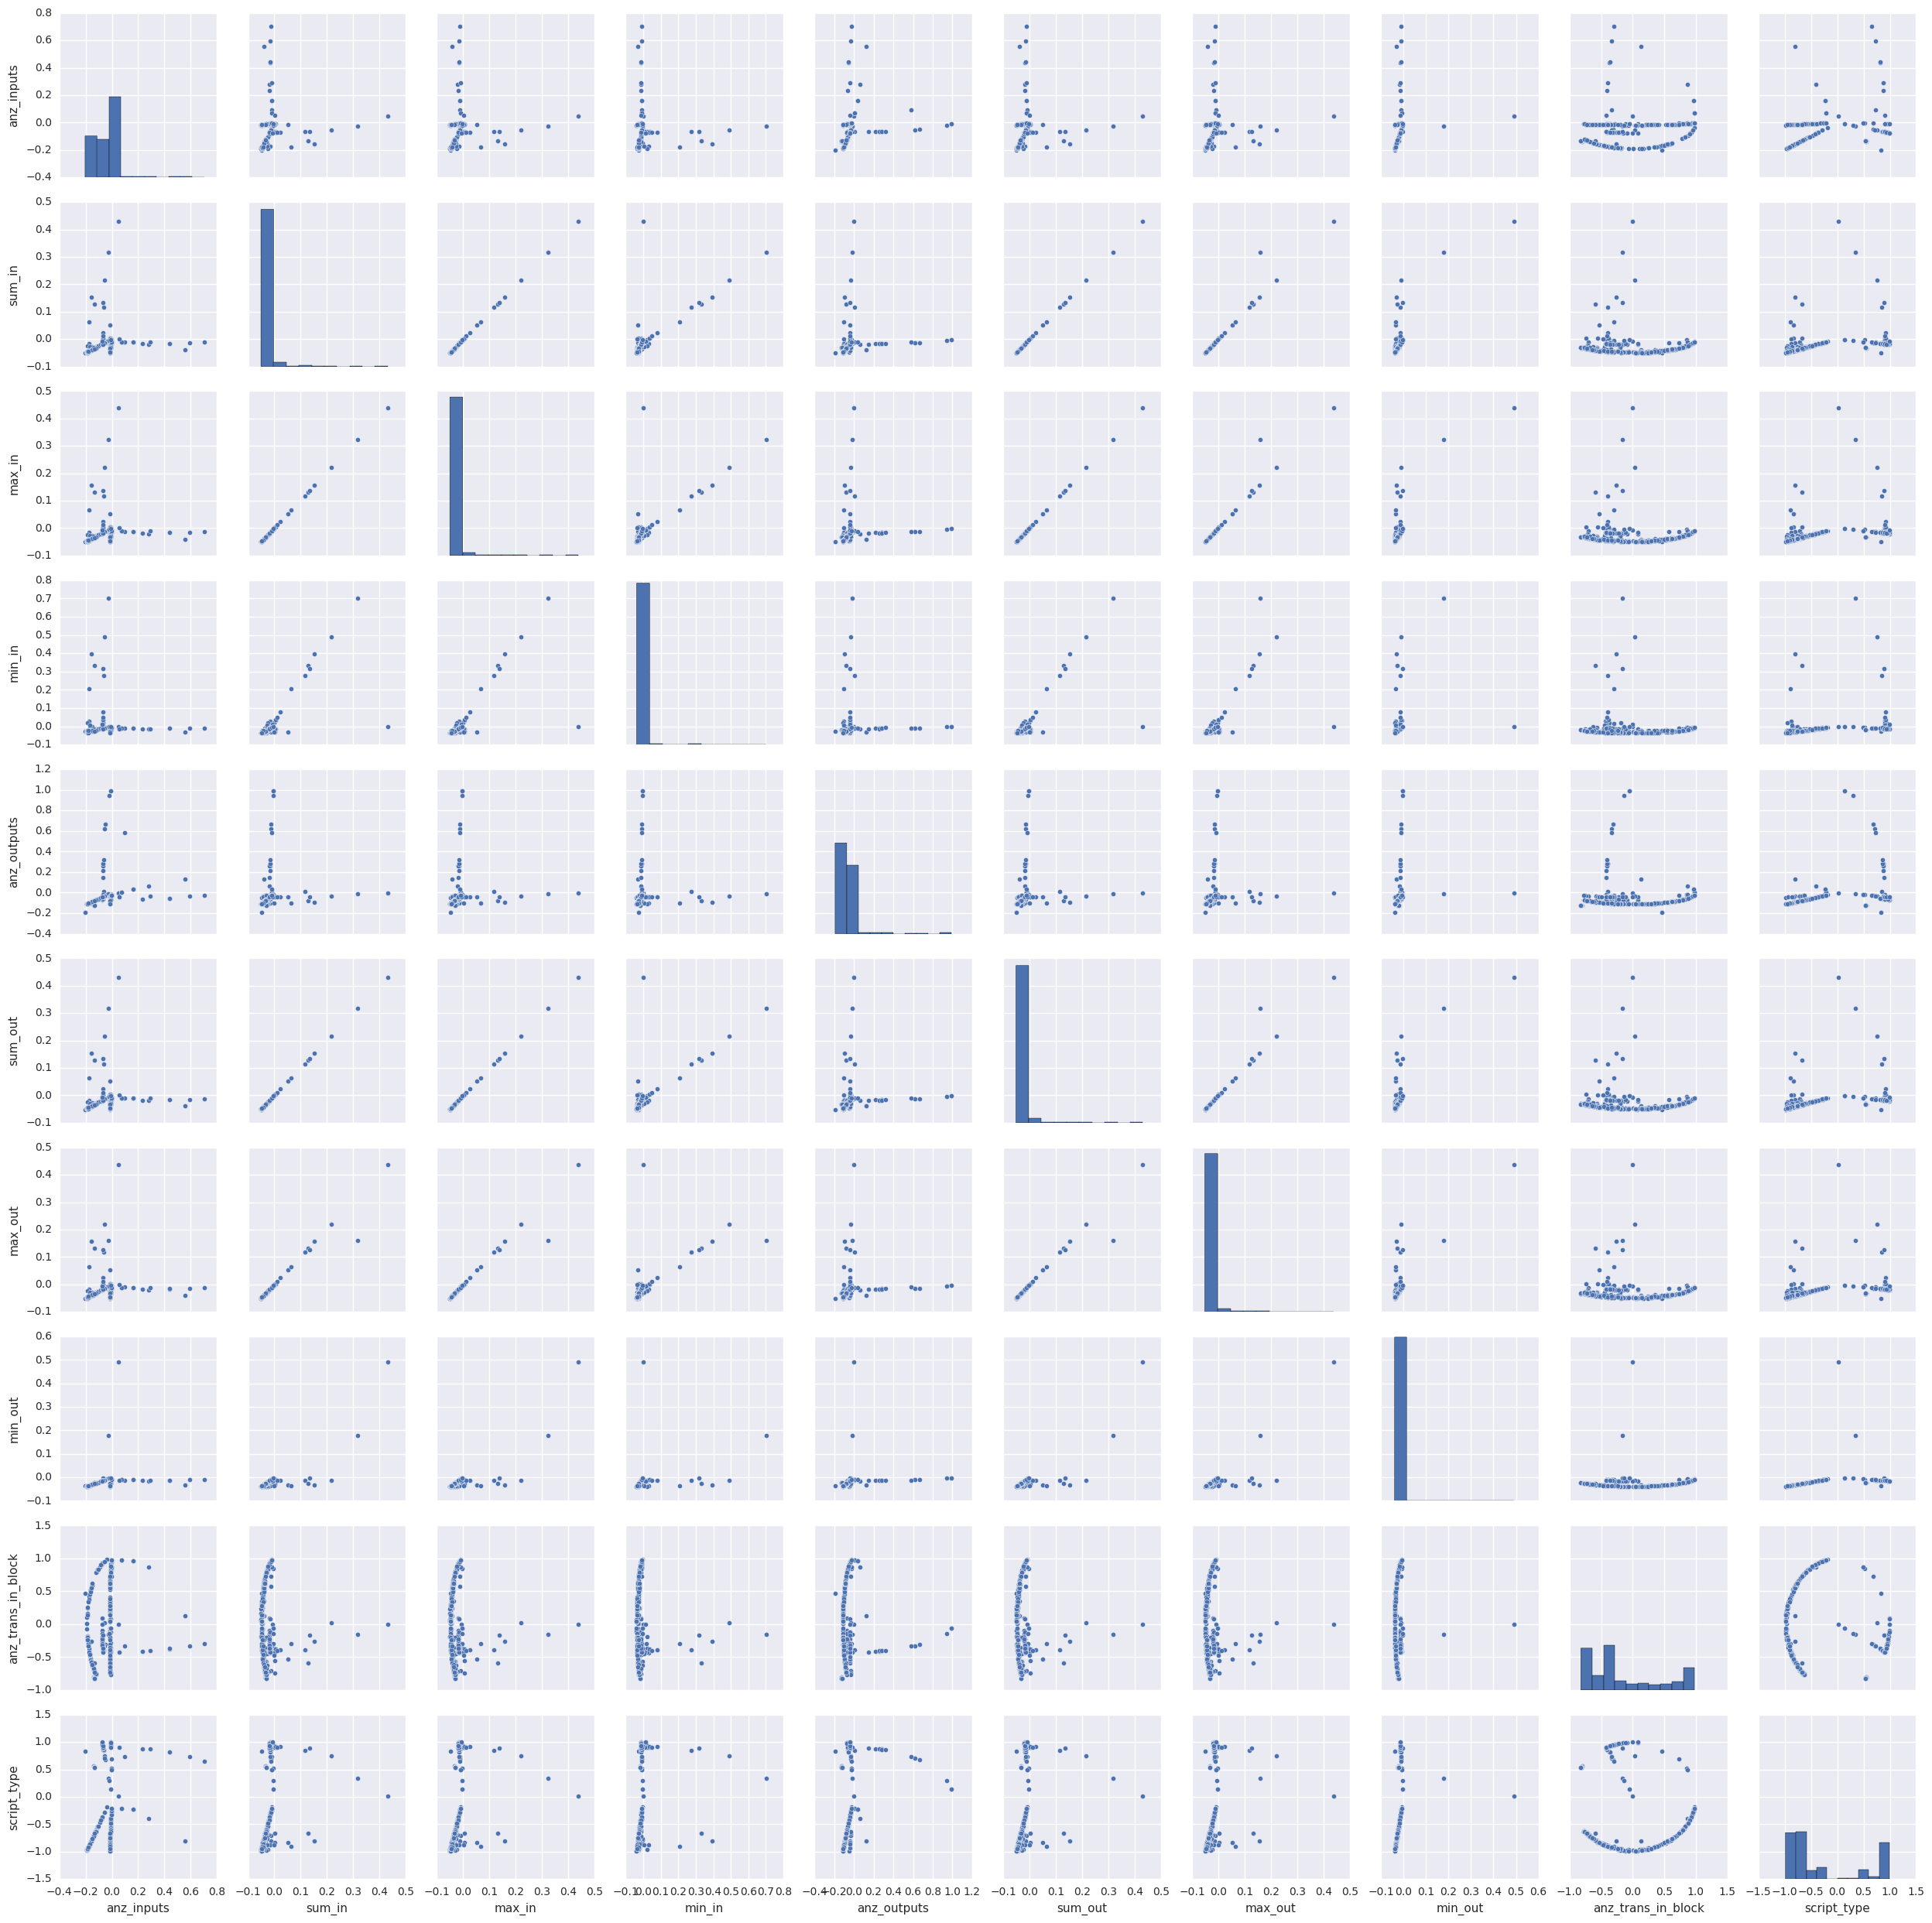

In [17]:
#draw random sample of our dataframe
import seaborn as sns
sns.set()
sns.pairplot(df_norm[labels_all].sample(500))

Observations:
* alle summen und maxima / minima verhalten sich sehr linear zueinander , was zu erarten da sum input = sum output - transaction gebühr --> die sollte klein und relativ gleich
* max_in -> min_out bei kleinem max in - kleines min _out -> macht sinn (wegen transaktionsumme = in +out; aber wenn max_in größer -> cluster bei min_out auch klein --> change meistens dabei
auch spannend: ausreisser bei max_out groß und großen min_out --> whats that?
* anz_outputs to max_out -> bei kleinen outputs alles möglich -> bei großem output nur kleine max_out -->deutet hin auf auszahlungen bei mining pools



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06edf24f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06e7c25780>]], dtype=object)

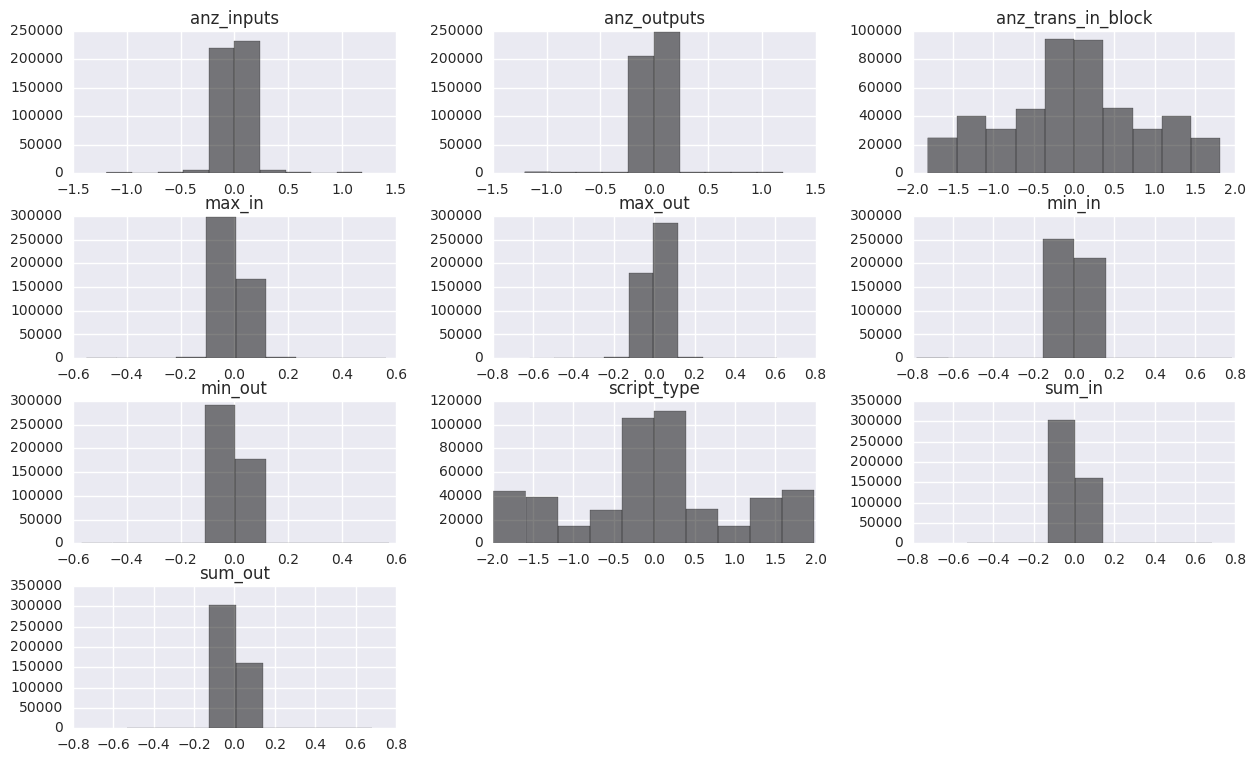

In [18]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 15, 9
plt.figure()
df_norm[labels_all].diff().hist(color='k', alpha=0.5, bins=10)

# Clustering

Now that we have prepared the data we can go for our clustering. Which Algorithm to choose?

We have about 450.000 observations and this is just a 10% sample. We want to cluster the whole set so we need a scalable solution. [Birch](http://scikit-learn.org/stable/modules/clustering.html#birch) comes to mind. It offers the possibilty to work with large datasets and you dont have to specifiy the amount of clusters

lets just give this a shot. we may reevaluate our choice later on anyway.

Quick Note on what does Birch do:
"The Birch builds a tree called the Characteristic Feature Tree (CFT) for the given data. The data is essentially lossy compressed to a set of Characteristic Feature nodes (CF Nodes). The CF Nodes have a number of subclusters called Characteristic Feature subclusters (CF Subclusters) and these CF Subclusters located in the non-terminal CF Nodes can have CF Nodes as children.

The Birch algorithm has two parameters, the threshold and the branching factor. The branching factor limits the number of subclusters in a node and the threshold limits the distance between the entering sample and the existing subclusters."

To find the best value for threshold which more or less correlates to the amount of clusters we run Birch iteratively and compare their Shilouette Coeffizents and Calinsky Scores.

As visual we show the cluster centroids of in the coordinate space of max_in,max_out. + are our datapoints, crosses are centroids.

As Second algorithm and for comparison we minibatch k-means

for ref : [Calinski-Harabaz Score](http://scikit-learn.org/stable/modules/clustering.html#calinski-harabaz-index)
[Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient).

In [40]:
for n_clusters in range(2,50):
    cluster_model = MiniBatchKMeans(n_clusters=n_clusters,batch_size=5000)
    cluster_labels = cluster_model.fit_predict(df_norm[labels_all])
    silhouette_avg = silhouette_score(df_norm[labels_all],cluster_labels,metric='euclidean',sample_size=5000)
    calinski = calinski_harabaz_score(df_norm[labels_all], cluster_labels)
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg,
         "The Calinski Score is:", calinski)

For n_clusters = 2 The average silhouette_score is: 0.582522691628 The Calinski Score is: 604870.569982
For n_clusters = 3 The average silhouette_score is: 0.677669334838 The Calinski Score is: 1333522.05716
For n_clusters = 4 The average silhouette_score is: 0.644276892854 The Calinski Score is: 1360445.04969
For n_clusters = 5 The average silhouette_score is: 0.612822477249 The Calinski Score is: 1281680.49983
For n_clusters = 6 The average silhouette_score is: 0.576294672589 The Calinski Score is: 1288935.69384
For n_clusters = 7 The average silhouette_score is: 0.613695231518 The Calinski Score is: 1379290.18256
For n_clusters = 8 The average silhouette_score is: 0.570768734661 The Calinski Score is: 1288453.2428
For n_clusters = 9 The average silhouette_score is: 0.634481122503 The Calinski Score is: 1509738.79526
For n_clusters = 10 The average silhouette_score is: 0.605099168404 The Calinski Score is: 1706804.59394
For n_clusters = 11 The average silhouette_score is: 0.585937004

In [46]:
from sklearn.cluster import Birch
for threshold in [0.09,0.1,0.2,0.3,0.4,0.5]:
    brc = Birch(branching_factor=50, n_clusters=None, threshold=threshold,compute_labels=True)
    brc.fit(df_norm[labels_all])
    assignments = brc.predict(df_norm[labels_all])
    silhouette_avg = silhouette_score(df_norm[labels_all], assignments, metric='euclidean',sample_size=5000)
    calinski = calinski_harabaz_score(df_norm[labels_all], assignments) 
    print("For threshold =", threshold, 
          "The average silhouette_score is:", silhouette_avg,
          "The Calinski Score is:", calinski,
          "The amount of clusters is:",str(len(brc.subcluster_labels_)))
    #c = brc.subcluster_centers_
    #tmp = df_norm.sample(4000)
    #plt.plot(tmp['max_in'], tmp['max_out'], 'D')
    #plt.plot(c[:,2], c[:,6], 'o')
    #plt.show()

For threshold = 0.09 The average silhouette_score is: 0.504870139842 The Calinski Score is: 613120.394402 The amount of clusters is: 417
For threshold = 0.1 The average silhouette_score is: 0.425800183248 The Calinski Score is: 472330.520504 The amount of clusters is: 344
For threshold = 0.2 The average silhouette_score is: 0.565893429011 The Calinski Score is: 551207.501249 The amount of clusters is: 47
For threshold = 0.3 The average silhouette_score is: 0.562431530595 The Calinski Score is: 910074.452108 The amount of clusters is: 18
For threshold = 0.4 The average silhouette_score is: 0.612112251053 The Calinski Score is: 773427.02126 The amount of clusters is: 8
For threshold = 0.5 The average silhouette_score is: 0.679919751364 The Calinski Score is: 1333643.95908 The amount of clusters is: 3


In [41]:
#zoom in on 0.4 dont take values aboth 0.5 since we dont want less then 3 clusters .-)
from sklearn.cluster import Birch
for threshold in [0.45,0.46,0.47,0.48,0.49,0.5]:
    brc = Birch(branching_factor=50, n_clusters=None, threshold=threshold,compute_labels=True)
    brc.fit(df_norm[labels_all])
    assignments = brc.predict(df_norm[labels_all])
    silhouette_avg = silhouette_score(df_norm[labels_all], assignments, metric='euclidean',sample_size=5000)
    calinski = calinski_harabaz_score(df_norm[labels_all], assignments) 
    print("For threshold =", threshold, 
          "The average silhouette_score is:", silhouette_avg,
          "The Calinski Score is:", calinski,
          "The amount of clusters is:",str(len(brc.subcluster_labels_)))
    #c = brc.subcluster_centers_
    #tmp = df_norm.sample(4000)
    #plt.plot(tmp['max_in'], tmp['max_out'], 'D')
    #plt.plot(c[:,2], c[:,6], 'o')
    #plt.show()

For threshold = 0.45 The average silhouette_score is: 0.64987954674 The Calinski Score is: 545516.671691 The amount of clusters is: 8
For threshold = 0.46 The average silhouette_score is: 0.586863172301 The Calinski Score is: 426701.253467 The amount of clusters is: 10
For threshold = 0.47 The average silhouette_score is: 0.680448236169 The Calinski Score is: 1333643.95908 The amount of clusters is: 3
For threshold = 0.48 The average silhouette_score is: 0.678992368548 The Calinski Score is: 1333643.95908 The amount of clusters is: 3
For threshold = 0.49 The average silhouette_score is: 0.67750539687 The Calinski Score is: 1333643.95908 The amount of clusters is: 3
For threshold = 0.5 The average silhouette_score is: 0.675692405306 The Calinski Score is: 1333643.95908 The amount of clusters is: 3


for further analysis we should take the highest score.

minibatch k-means:
For n_clusters = 3 The average silhouette_score is: 0.677669334838 The Calinski Score is: 1333522.05716
For n_clusters = 48 The average silhouette_score is: 0.531721437972 The Calinski Score is: 2463135.63332

The calinski score seems to osciliate the higher the cluster size gets. Since we cant really analyze 48 separate clusters lets go with silhouette score.

birch
For threshold = 0.47 The average silhouette_score is: 0.680448236169 The Calinski Score is: 1333643.95908 The amount of clusters is: 3

we tried to go lower than threshhold 0.09 but memory crashed


In [47]:
threshold=0.47
brc = Birch(branching_factor=50, n_clusters=None, threshold=threshold,compute_labels=True)
brc.fit(df_norm[labels_all])
assignments = brc.predict(df_norm[labels_all])
silhouette_avg = silhouette_score(df_norm[labels_all], assignments, metric='euclidean',sample_size=5000)
calinski = calinski_harabaz_score(df_norm[labels_all], assignments) 
print("For threshold =", threshold, 
          "The average silhouette_score is:", silhouette_avg,
          "The Calinski Score is:", calinski,
          "The amount of clusters is:",str(len(brc.subcluster_labels_)))

For threshold = 0.47 The average silhouette_score is: 0.679847895959 The Calinski Score is: 1333643.95908 The amount of clusters is: 3


In [48]:
df['assignments'] = assignments
df_norm['assignments'] = assignments

In [49]:
df.head()

,txid,bitcoin_block_hash,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,sample_id,assignments
0,000067aab52e2fc6bbf6acf49369f5e7e5caf43e88ab92...,8efe9c7fa8114641c04f64a8c5266b0070ee253e395d76...,1426729457,28928,2,22.90,22.89,0.01,2,22.89,22.88,0.01,221,0,8,0
1,00006a088a7d69602bc3dbb7f37ab89bd830806d3aa04f...,b5f8270000c0eaf2f20ea899caf4c248a9765e1d8e6769...,1470465833,28928,6,25.95,8.64,0.01,6,25.92,8.63,0.01,1419,0,8,1
2,0000e5b7217ee5f13bd808b1484abc1d43222364b09608...,a8aa181b737360ff9e89cbb28bf9b46862b4392d39a749...,1472222325,28928,2,38.91,38.90,0.01,2,38.90,38.89,0.01,26,0,8,0
3,000176f4c18b578088ee265b6004b2d434edd2f21372c2...,51c8a30fe2dcfd5395e806ea2f4ae0559237a6f007d36f...,1410052295,28928,1,0.01,0.01,0.01,1,0.01,0.01,0.01,28,2,8,2
4,0001b50a5b744bcc23385e65f931f89f9c0f6c6042742a...,285f032b26971de702446bb35b271ee05d43d574587e1c...,1448873436,28928,2,18.39,18.38,0.01,2,18.39,18.38,0.01,848,0,8,1


In [50]:
df.groupby(['assignments']).size()

assignments
0    187546
1    141671
2    140600
dtype: int64

# Interpretation

In [51]:
#get labels
label_assignments = df['assignments'].unique()

0
1
2


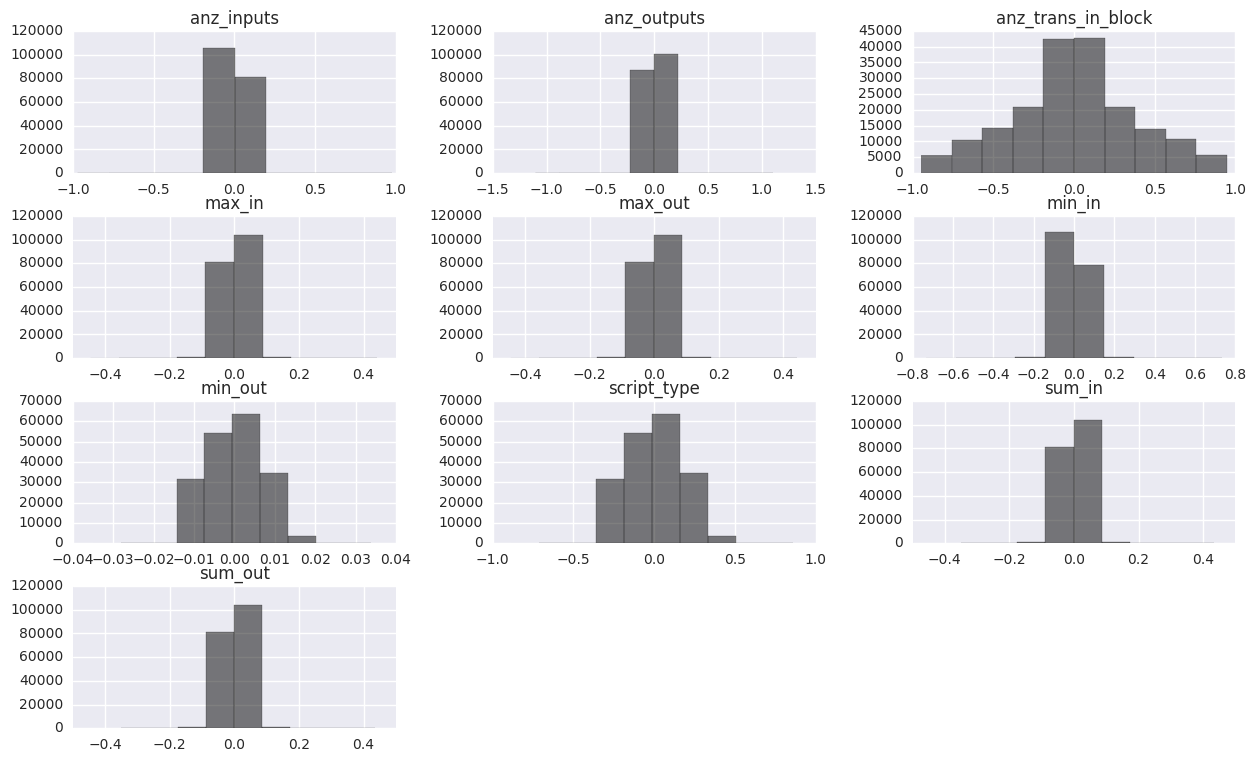

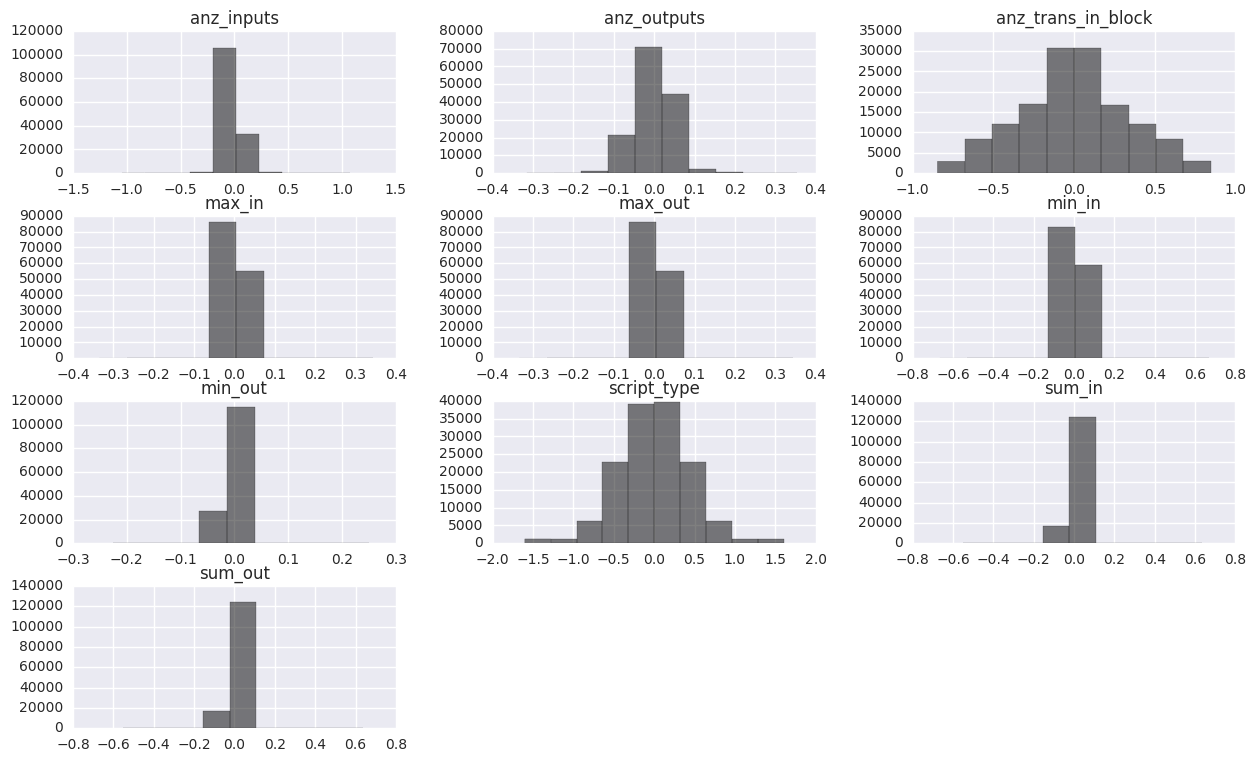

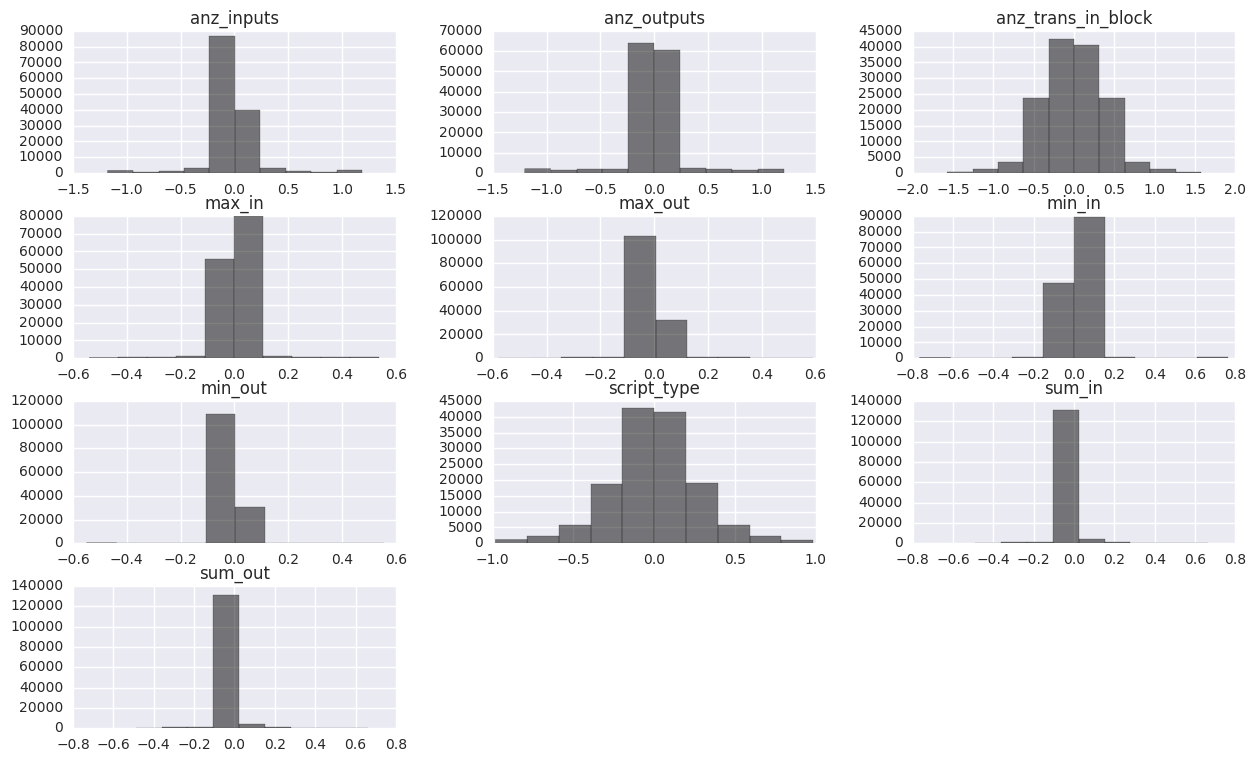

In [52]:
from matplotlib import rcParams
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = 15, 9
for label_assignment in label_assignments:
    print(label_assignment)
    df_norm[df_norm['assignments'] == label_assignment][labels_all].diff().hist(color='k', alpha=0.5, bins=10)

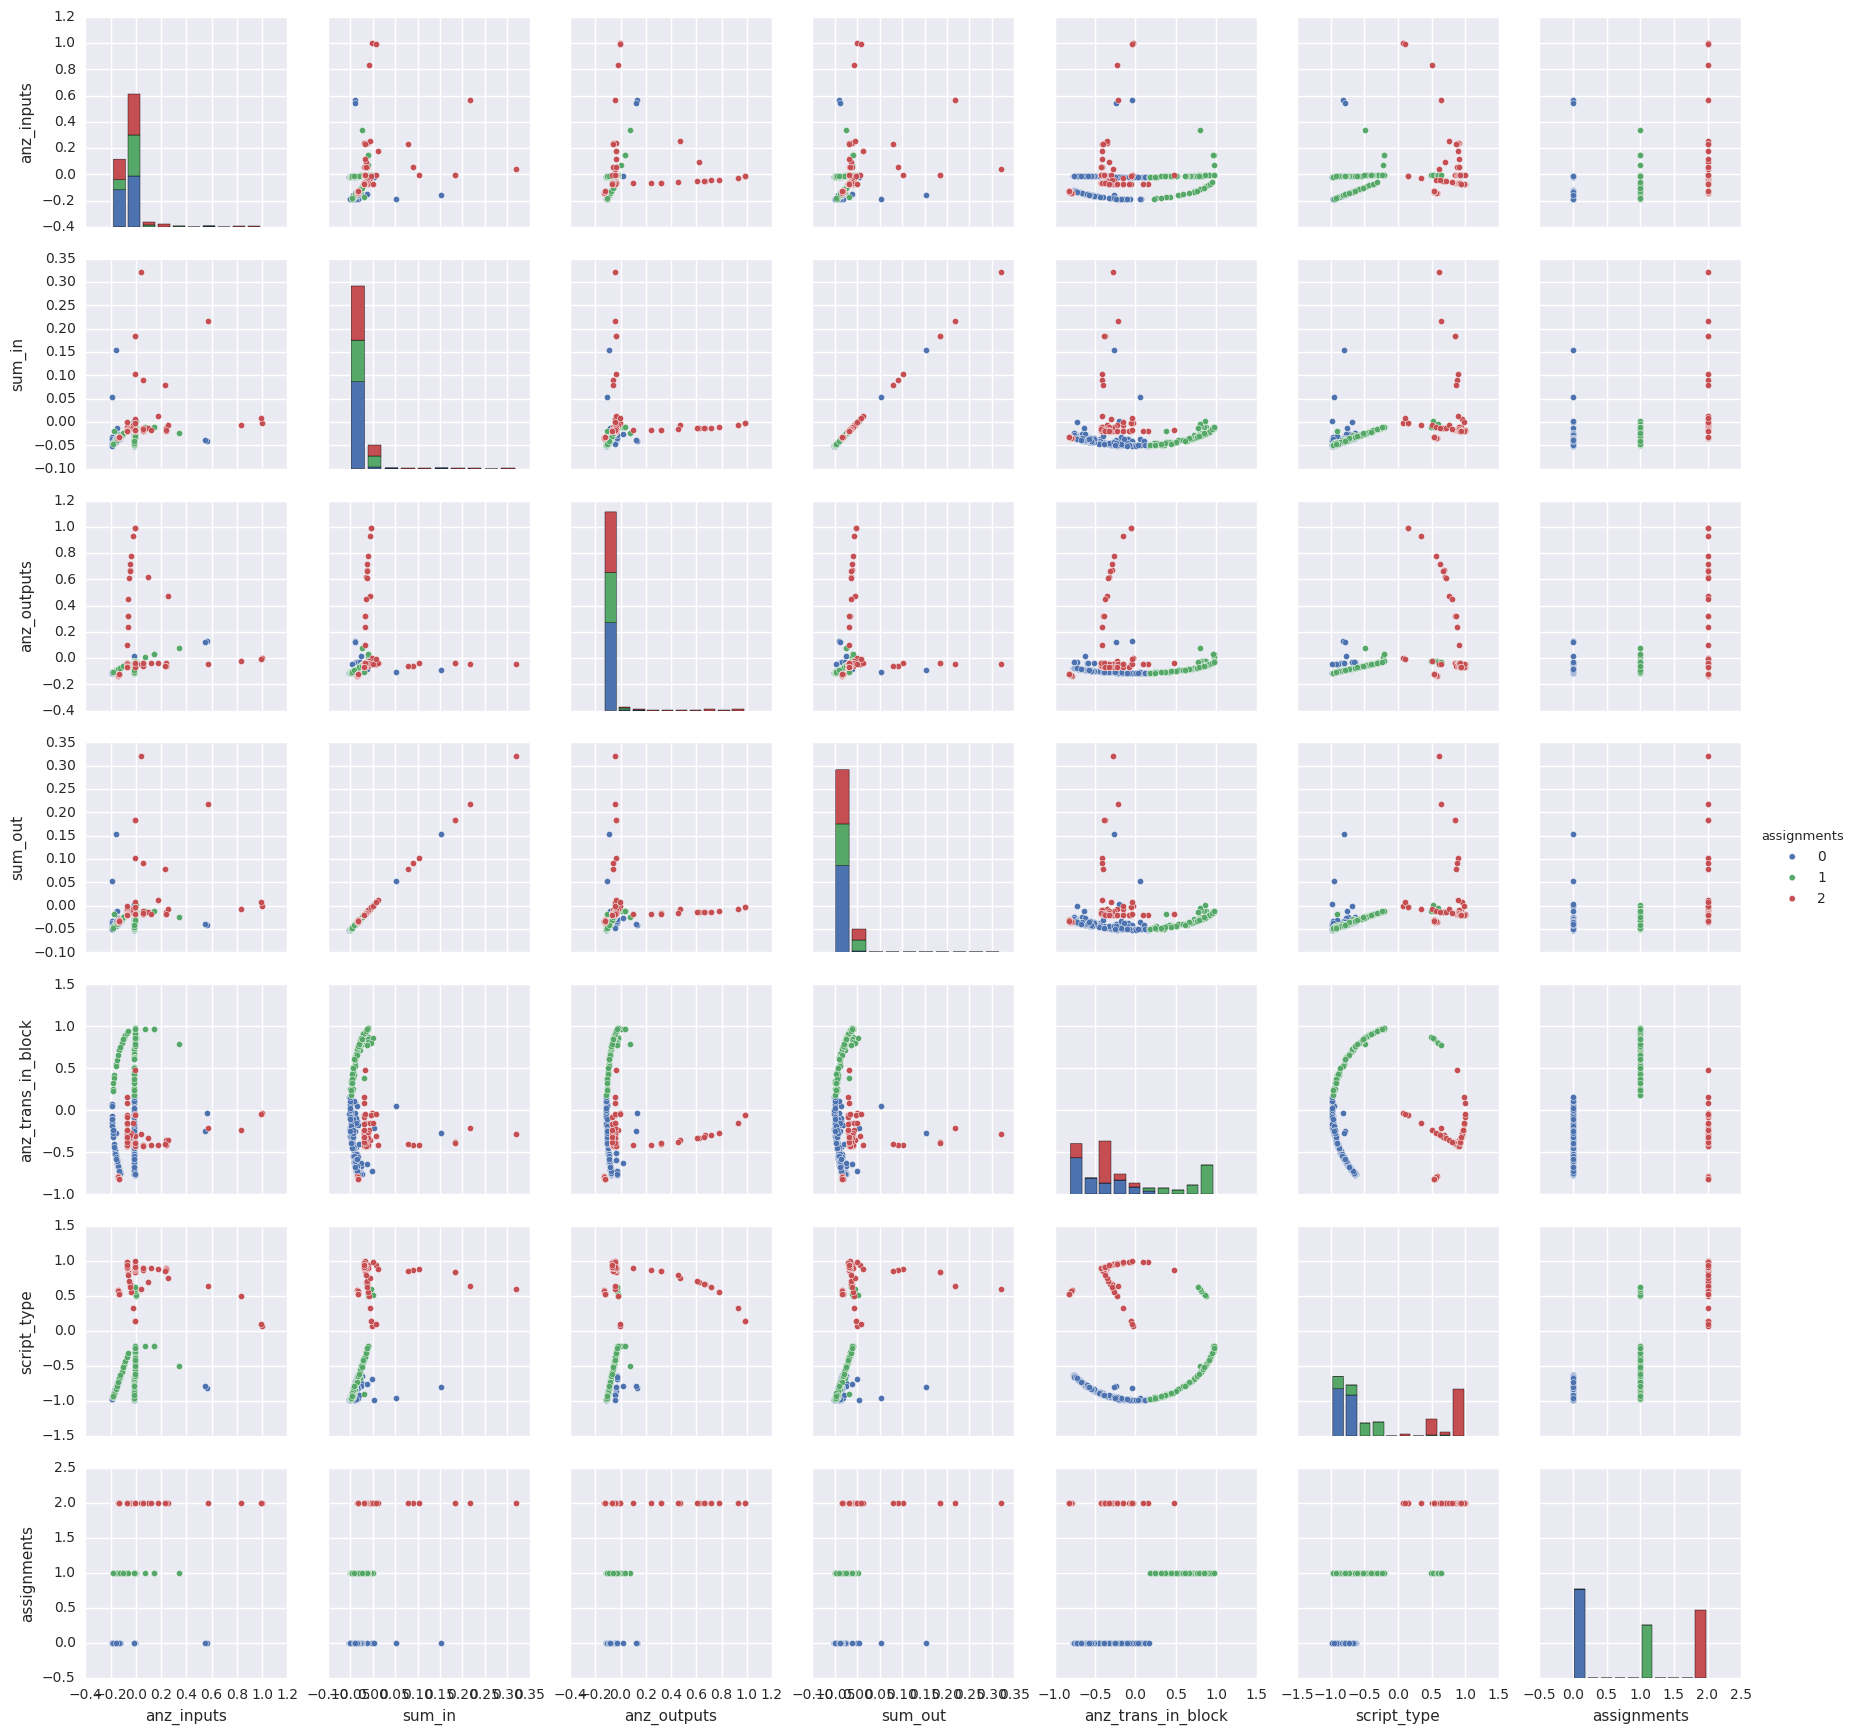

In [53]:
#draw random sample of our dataframe
import seaborn as sns
sns.set()
sns.pairplot(df_norm[labels_all_ass].sample(500), hue="assignments")

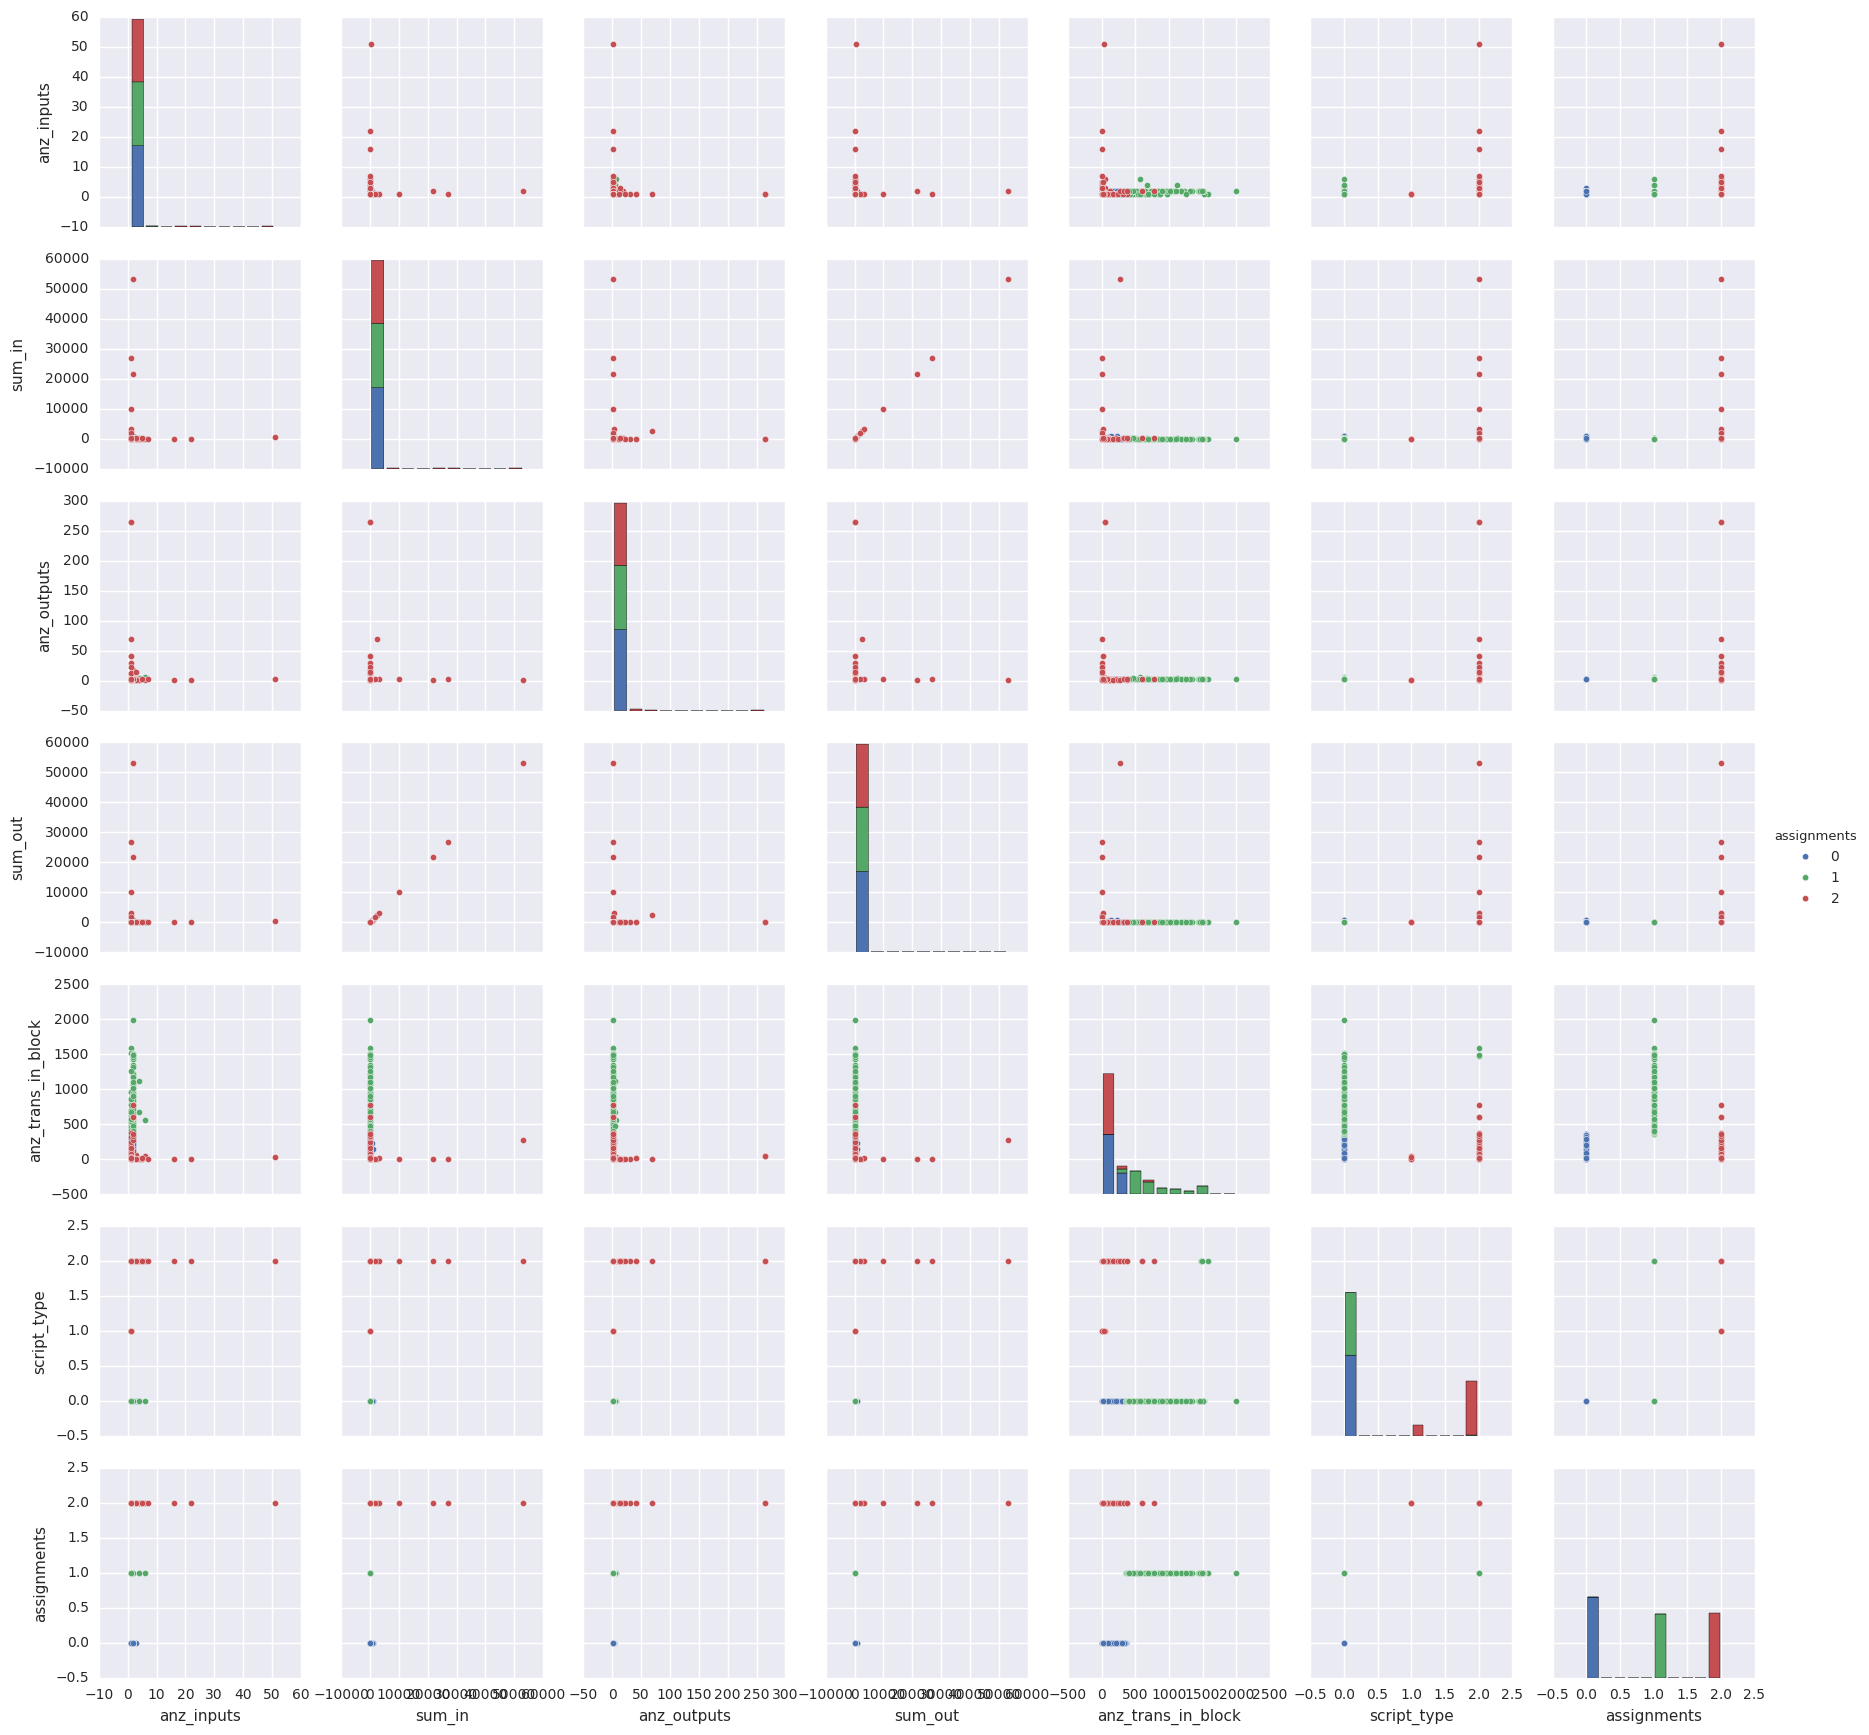

In [54]:
#draw random sample of our dataframe
import seaborn as sns
sns.set()
sns.pairplot(df[labels_all_ass].sample(500), hue="assignments")

create a decision tree on the base values to see if we can differentiate cluster assignments easily

In [55]:
!conda install -c conda-forge pydotplus -y > out
!conda install graphviz -y > out
import pydotplus 

In [56]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=6)
clf = clf.fit(df[labels_all], df['assignments'])

In [57]:
clf.feature_importances_

array([  1.27543211e-04,   0.00000000e+00,   1.93102160e-05,
         3.70967799e-04,   1.28917885e-05,   0.00000000e+00,
         3.22420791e-06,   0.00000000e+00,   5.35760620e-01,
         4.63705443e-01])

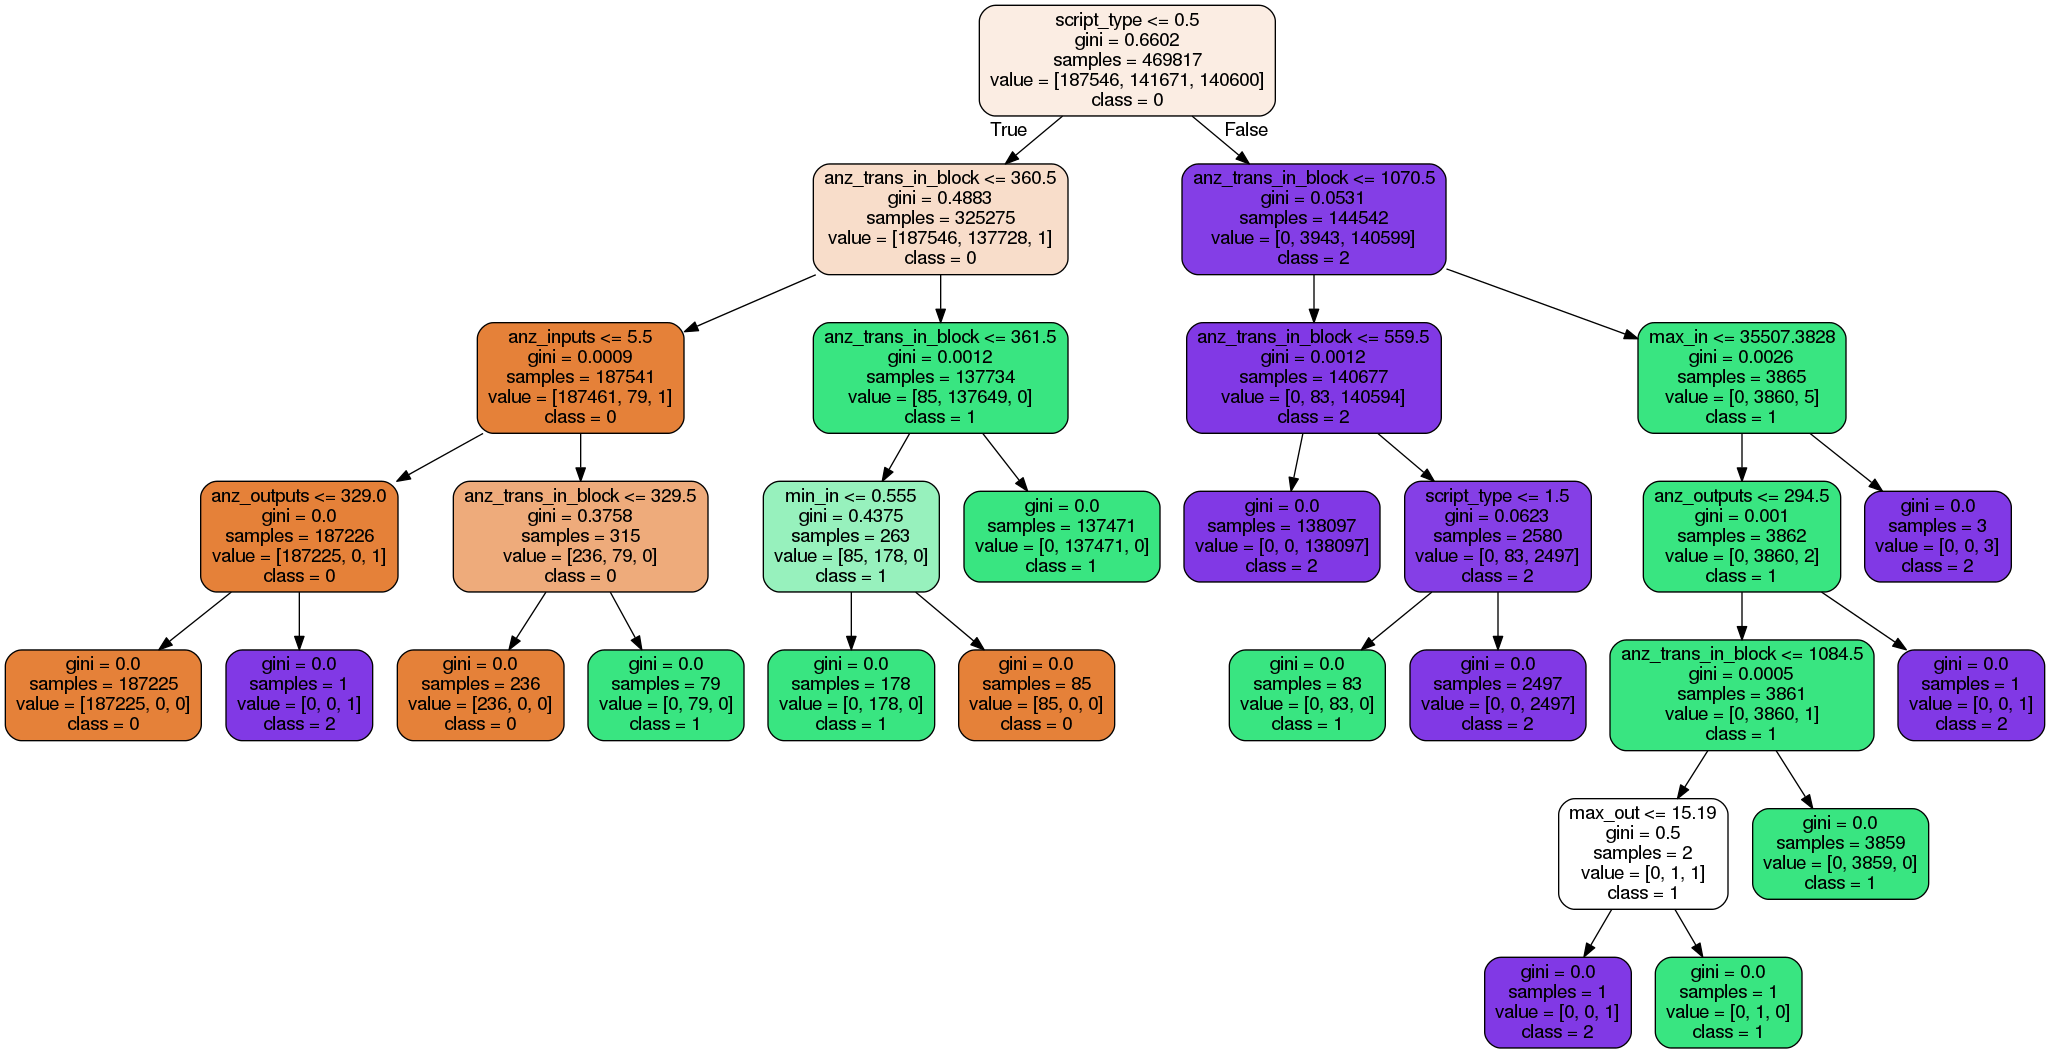

In [58]:
strlabels = []
for item in label_assignments:
    strlabels.append(str(item))
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=labels_all,   
                         filled=True, rounded=True,  
                                class_names= strlabels
                        )  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

3 clusters and 3 nodes that look important


class 0 : script type <= 0.5 (mehr)  ; anz_trans_block <=360.5 ; anz_inputs <= 5,5 ; anz_outputs <=329

class 1: anz_trans_block >= 361.5

class 2: script type 1,2 ; anz_trans_block < 559

## conclusion
TBD

# Save Dataframes
to make our next clustering easier we save the transformed data

In [59]:
df.head(1)

,txid,bitcoin_block_hash,time,version,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,sample_id,assignments
0,000067aab52e2fc6bbf6acf49369f5e7e5caf43e88ab92...,8efe9c7fa8114641c04f64a8c5266b0070ee253e395d76...,1426729457,28928,2,22.90,22.89,0.01,2,22.89,22.88,0.01,221,0,8,0


In [60]:
df_norm.head(1)

,anz_inputs,sum_in,max_in,min_in,anz_outputs,sum_out,max_out,min_out,anz_trans_in_block,script_type,assignments
0,-0.02,-0.05,-0.05,-0.04,-0.11,-0.05,-0.05,-0.04,-0.34,-0.93,0


In [61]:
df.to_csv('namecoin_ml_assigned.csv', index=False)
df_norm.to_csv('namecoin_ml_assigned.csv', index=False)

# Next

* install docker and thrive basic image for the guys on the server
* remove some sum features, add better types
* We can compare cluster assignments and known cases of squatting if they are in the same cluster or not 
* Could do PCA to have the option to do more cluster algorithms